In [1]:
# Machine learning
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np
import pandas_datareader.data as web


# To plot
import matplotlib.pyplot as plt
import seaborn


In [2]:
def nulls(df):
    nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
    nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
    nulls.sort_values('porcentaje')
    return nulls

In [3]:
from sklearn.metrics import mean_absolute_error
def calculate_error(test_y, predicted):
    return mean_absolute_error(test_y, predicted)
#The best possible score is 1.0, lower values are worse.
from sklearn.metrics import explained_variance_score
def variance_score(test_y, predicted):
    return explained_variance_score(test_y, predicted) 
from sklearn.metrics import median_absolute_error
def median_error(test_y, predicted):
    return median_absolute_error (test_y, predicted) 
from sklearn.metrics import r2_score
def r2(test_y, predicted):
    return r2_score(test_y, predicted) 
from sklearn.metrics import mean_squared_error
def mse(test_y, predicted):
    return mean_squared_error(test_y, predicted)

In [4]:
def add_original_feature(df, df_new):
    df_new['open'] = df['open']
    df_new['open_1'] = df['open'].shift(1)
    df_new['close_1'] = df['close'].shift(1)
    df_new['high_1'] = df['high'].shift(1)
    df_new['low_1'] = df['low'].shift(1)
    df_new['volume_1'] = df['volume'].shift(1)
    df_new['H-L'] = df['high'].shift(1) - df['low'].shift(1)
    df_new['O-C'] = df['close'].shift(1) - df['open'].shift(1)

In [5]:
def add_avg_price(df, df_new):
    df_new['avg_price_5'] = df['close'].rolling(5).mean().shift(1)
    df_new['avg_price_30'] = df['close'].rolling(21).mean().shift(1)
    df_new['avg_price_365'] = df['close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']

In [6]:
def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] = df['volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

In [7]:
def add_std_price(df, df_new):
    df_new['std_price_5'] = df['close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365'] 
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']

In [8]:
def add_std_volume(df, df_new):
    df_new['std_volume_5'] = df['volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']

In [9]:
def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['close'] - df['close'].shift(1)) / df['close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['close'] - df['close'].shift(5)) / df['close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['close'] - df['close'].shift(21)) / df['close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['close'] - df['close'].shift(252)) / df['close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)
    

In [10]:
def generate_features(df):
    """"Generate features for a stock/index based on historical price and performance
    @param df: dataframe with columns "Open", "Close", "High",
    "Low", "Volume", "Adjusted Close"
     @return: dataframe, data set with new features"""
    #df.rename(columns={'Date':'date','Open':'open', 'High': 'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace=True)
    df.date = pd.to_datetime(df.date)
    df.set_index('date', inplace=True)
    df_new = pd.DataFrame()
    # 6 original features
    add_original_feature(df, df_new)
    # 31 generated features
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    # the target
    df_new['Price_Rise'] = np.where(df['close'] > df['close'].shift(1), 1, 0)
    #df_new['Price_Rise']=df_new['Price_Rise'].shift(-1)
    #df_new = df_new.iloc[:, 4:]
    df_new['close'] = df['close']
    #df_new = df_new.dropna(axis=0)
    
    return df_new

#os.environ["IEX_API_KEY"] ='pk_e271b18147e74da39d11e3ce6db5f471'

In [11]:
# collect data for  from 2017-04-22 
symbol='KLAC'
start = '2006-01-01'
end = pd.to_datetime('today')
df = web.DataReader(name=symbol, data_source='iex', start=start, end=end, api_key='pk_e271b18147e74da39d11e3ce6db5f471')
df.reset_index(inplace=True)


df=pd.read_csv('KLAC_hist.csv')

In [12]:
df.tail()

,date,open,high,low,close,volume
1253,2020-01-14,175.91,178.22,174.07,177.48,1279640
1254,2020-01-15,177.09,178.70,175.85,177.92,922813
1255,2020-01-16,179.50,181.83,179.01,180.91,1197268
1256,2020-01-17,180.87,180.90,177.36,178.73,1604769
1257,2020-01-21,177.65,180.89,177.57,178.81,1571351


df=df.append({'Date': '2019-12-27', 'Open': 179.25, 'Close':0}, ignore_index=True)

#del df
df=pd.read_csv('KLAC.csv')

api_key_alpha='LQ7YJVLYENUQ88GJ'

from datetime import datetime
f = web.DataReader("KLAC", "av-daily", start=datetime(2016,11, 1), end=datetime(2019,12,17), api_key=api_key_alpha)

In [13]:
data = generate_features(df)

In [14]:
data.columns

Index(['open', 'open_1', 'close_1', 'high_1', 'low_1', 'volume_1', 'H-L',
       'O-C', 'avg_price_5', 'avg_price_30', 'avg_price_365',
       'ratio_avg_price_5_30', 'ratio_avg_price_5_365',
       'ratio_avg_price_30_365', 'avg_volume_5', 'avg_volume_30',
       'avg_volume_365', 'ratio_avg_volume_5_30', 'ratio_avg_volume_5_365',
       'ratio_avg_volume_30_365', 'std_price_5', 'std_price_30',
       'std_price_365', 'ratio_std_price_5_30', 'ratio_std_price_5_365',
       'ratio_std_price_30_365', 'std_volume_5', 'std_volume_30',
       'std_volume_365', 'ratio_std_volume_5_30', 'ratio_std_volume_5_365',
       'ratio_std_volume_30_365', 'return_1', 'return_5', 'return_30',
       'return_365', 'moving_avg_5', 'moving_avg_30', 'moving_avg_365',
       'Price_Rise', 'close'],
      dtype='object')

In [ ]:
data.tail(4)

for t in [1]:
    data[f'target_{t}m'] = data[f'return_{t}'].shift(-t)

In [15]:
data.to_csv("~/Dropbox/{}.csv".format(symbol+'mod'))

In [18]:
#  quitamos del archivo la columna con el label target.
X=data.drop(columns=['Price_Rise','close'])
# por otro lado armamos el arhivo con los resultados
y=(data.close)

In [19]:
X.dropna(inplace=True)
y.dropna(inplace=True)

In [20]:
def get_holdout_set(target, features, period=6):
    idx = pd.IndexSlice
    label = target.name
    dates = np.sort(y.index.get_level_values('date').unique())
    cv_start, cv_end = dates[0], dates[-period - 2]
    holdout_start, holdout_end = dates[-period - 1], dates[-1]

    df = features.join(target.to_frame())
    train = df.loc[idx[cv_start: cv_end], :]
    y_train, X_train = train[label], train.drop(label, axis=1)

    test = df.loc[idx[holdout_start: holdout_end], :]
    y_test, X_test = test[label], test.drop(label, axis=1)
    return y_train, X_train, y_test, X_test

In [21]:
train_y, train_X, test_y, test_X= get_holdout_set(y, X, period=12)

In [22]:
X_train=train_X.values
y_train=train_y.values
X_test=test_X.values
y_test=test_y.values

In [23]:
y_test

array([182.57, 179.08, 175.05, 176.44, 176.67, 175.49, 173.01, 175.1 ,
       177.48, 177.92, 180.91, 178.73, 178.81])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [1e-5, 3e-5, 1e-4],"eta0": [0.01, 0.03, 0.1],}
lr = SGDRegressor(penalty='l2', n_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear

C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\FLORENCIA\Anaconda\lib\site-packages\sklearn\linear

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=1000, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 3e-05, 0.0001], 'eta0': [0.01, 0.03, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [26]:
print(grid_search.best_params_)


{'alpha': 3e-05, 'eta0': 0.03}


In [27]:
lr_best = grid_search.best_estimator_
predictions_lr = lr_best.predict(X_scaled_test)

In [28]:
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lr)))


MSE: 4.162


In [29]:
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lr)))

MAE: 1.488


In [30]:
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lr)))

R^2: 0.332


In [31]:
predictions_lr

array([181.2039208 , 180.09968735, 177.40374543, 177.01729509,
       177.41449456, 179.32423066, 177.61012029, 175.34206501,
       176.69524023, 177.86307464, 179.98901725, 181.44554134,
       178.68676871])

In [32]:
y_test

array([182.57, 179.08, 175.05, 176.44, 176.67, 175.49, 173.01, 175.1 ,
       177.48, 177.92, 180.91, 178.73, 178.81])

In [33]:
test=pd.DataFrame(y_test)

In [34]:
predictions_lr=pd.DataFrame(predictions_lr)

In [38]:
test=test.merge(predictions_lr, left_index=True, right_index=True, how='left')

In [39]:
test['Price_Rise'] = np.where(test['0_x'] > test['0_x'].shift(1), 1, 0)
test['Price_Rise_modelo'] = np.where(test['0_y'] > test['0_y'].shift(1), 1, 0)

In [40]:
#Computing Strategy Returns
test['Tomorrows Returns'] = 0
test['Tomorrows Returns'] = np.log(test['0_x']/test['0_x'].shift(1))
test

,0_x,0_y,0,Price_Rise,Price_Rise_modelo,Tomorrows Returns
0,182.57,181.203921,181.203921,0,0,NaN
1,179.08,180.099687,180.099687,0,0,-0.019301
2,175.05,177.403745,177.403745,0,0,-0.022761
3,176.44,177.017295,177.017295,1,0,0.007909
4,176.67,177.414495,177.414495,1,1,0.001303
5,175.49,179.324231,179.324231,0,1,-0.006702
6,173.01,177.610120,177.610120,0,0,-0.014233
7,175.10,175.342065,175.342065,1,0,0.012008
8,177.48,176.695240,176.695240,1,1,0.013501
9,177.92,177.863075,177.863075,1,1,0.002476


In [41]:
test['Tomorrows Returns'] = test['Tomorrows Returns'].shift(-1)


In [42]:
test['Strategy Returns'] = 0.
test['Strategy Returns'] = np.where(test['Price_Rise_modelo'] == 1, 
             test['Tomorrows Returns'], - test['Tomorrows Returns'])

test['Cumulative Market Returns'] = np.cumsum(test['Tomorrows Returns'])
test['Cumulative Strategy Returns'] = np.cumsum(test['Strategy Returns'])

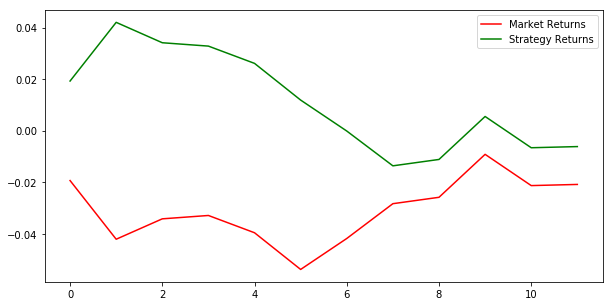

In [43]:
#Plotting the graph of returns
plt.figure(figsize=(10,5))
plt.plot(test['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(test['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

In [ ]:
param_grid = {'hidden_layer_sizes': [(50, 10), (30, 30)],'activation': ['logistic', 'tanh', 'relu'],'solver': ['sgd', 'adam'],
'learning_rate_init': [0.0001, 0.0003, 0.001, 0.01],
'alpha': [0.00003, 0.0001, 0.0003],
'batch_size': [30, 50]}

In [ ]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(random_state=42, max_iter=100)
grid_search = GridSearchCV(nn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_scaled_train, y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
nn_best = grid_search.best_estimator_
predictions_nn = nn_best.predict(X_scaled_test)

In [ ]:
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_nn)))

In [ ]:
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_nn)))

In [ ]:
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_nn)))

In [ ]:
predictions_nn

##Visualize what was collected with matplotlib
# select only close column
#del close
close = df[['date','close']]
# rename the column with symbole name
close = close.rename(columns={'close': symbol})
ax = close.plot(title='symbol')
ax.set_xlabel('date')
ax.set_ylabel('close price')
ax.grid()
plt.show()

close.set_index('Date', inplace=True)

close.index = pd.to_datetime(close.index)

# read csv file, use date as index and read close as a column
nfl = pd.read_csv('~/Dropbox/{}.csv'.format(symbol), index_col='date',
                 parse_dates=True, usecols=['date', 'close'],
                 na_values='nan')

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
monthly_prices = df.resample('M').last()

In [ ]:
data.head()

In [ ]:
#del data
outlier_cutoff = 0.01
mes = pd.DataFrame()
lags = [1, 2, 3, 6, 9, 12]
for lag in lags:
    mes[f'return_{lag}m'] = (monthly_prices
                           .pct_change(lag)
                           .stack()
                           .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                  upper=x.quantile(1-outlier_cutoff)))
                           .add(1)
                           .pow(1/lag)
                           .sub(1)
                           )
#data = data.swaplevel().dropna()
mes.info()


In [ ]:
mes.add(1).pow(1/lag).sub(1).head()
            

In [ ]:
data.head()

In [ ]:
mes.reset_index(inplace=True)
mes.set_index('date', inplace=True)

The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown 
empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. 
Hence, it is natural to include past factor exposures as financial features in models that aim to predict future returns.

In [ ]:
from pandas_datareader.famafrench import get_available_datasets

get_available_datasets()

In [ ]:
#del factor_data
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', start='1980')[0].drop('RF', axis=1)
#factor_data.index = factor_data.index.to_timestamp()
#factor_data = factor_data.resample('M').last().div(100) # lo paso a menual
#factor_data.index.name = 'date'
factor_data.info()

In [ ]:
factor_data.head()

In [ ]:
factor_data = factor_data.join(data['return_1']).sort_index() #agrego los retornos mensuales
factor_data.info()

In [ ]:
nulls(factor_data)

In [ ]:
factor_data.dropna(inplace=True)

In [ ]:
factor_data.head()

We can access the historical factor returns using the pandas-datareader and estimate historical exposures using 
the PandasRollingOLS rolling linear regression functionality in the pyfinance library as follows

In [ ]:
#analizo la importancia de los factores sobre la variación mensual de la acción, durante los 12 meses anteriores
from pyfinance.ols import PandasRollingOLS
T=30
y=factor_data.return_1

In [ ]:
X=factor_data.drop('return_1', axis=1)

In [ ]:
rolling = PandasRollingOLS(y=y, x=X, window=T)

In [ ]:
#del betas
betas=rolling.beta

In [ ]:
betas.describe().join(betas.sum(1).describe().to_frame('total'))

In [ ]:
betas.reset_index(inplace=True)

In [ ]:
betas.rename(columns={'Date':'date'}, inplace=True)

In [ ]:
betas.set_index('date', inplace=True)

betas=betas.shift()
betas.head()

In [ ]:
data = data.join(betas)
data.head()

In [ ]:
nulls(data)

#Impute mean for missing factor betas
data.loc[:, factors] = data[factors].apply(lambda x: x.fillna('backfill', x.mean()))

data.info()

In [ ]:
data.fillna(method='backfill', inplace=True)
data.fillna(method='pad', inplace=True)


Momentum factors
We can use these results to compute momentum factors based on the difference between returns over longer periods and the most recent monthly return, 
as well as for the difference between 3 and 12 month returns as follows:

for lag in [2,3,6,9,12]:
    data[f'momentum_{lag}'] = data[f'return_{lag}m'].sub(data.return_1m)
data[f'momentum_3_12'] = data[f'return_12m'].sub(data.return_3m)

In [ ]:
data.tail()

#Date Indicators
dates = data.index.get_level_values('Date')
data['year'] = dates.year
data['month'] = dates.month

Lagged returns
To use lagged values as input variables or features associated with the current observations, 
we use the .shift() method to move historical returns up to the current period:

In [ ]:
for t in range(1, 7):
    data[f'return_1m_t-{t}'] = data.return_1m.shift(t)
data.info()

Target: Holding Period Returns
Similarly, to compute returns for various holding periods, we use the normalized period returns computed previously 
and shift them back to align them with the current financial features

cols = ['target_1m',
        'target_2m',
        'target_3m', 'return_1m',
        'return_2m',
        'return_3m',
        'return_1m_t-1',
        'return_1m_t-2',
        'return_1m_t-3']

data[cols].dropna().sort_index().head(10)

data.dropna(inplace=True)

data.info()

data.reset_index(inplace=True)

data.drop(columns=['level_1'], inplace=True)

data = pd.get_dummies(data, columns=['year', 'month'])

data.set_index('date', inplace=True)

In [ ]:
data.to_csv("~/Dropbox/{}.csv".format(symbol+'mod'))

In [ ]:
del y
del X

In [44]:
y = data.close
y_binary = (y > 0).astype(int)
X = data.drop(columns=['close'])

In [45]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier, BaggingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, precision_recall_curve
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score, cross_validate


### Get Holdout Set
#### Create holdout test set to estimate generalization error after cross-validation:

In [46]:
def get_holdout_set(target, features, period=30):
    idx = pd.IndexSlice
    label = target.name
    dates = np.sort(y.index.get_level_values('date').unique())
    cv_start, cv_end = dates[0], dates[-period - 2]
    holdout_start, holdout_end = dates[-period - 1], dates[-1]

    df = features.join(target.to_frame())
    train = df.loc[idx[cv_start: cv_end], :]
    y_train, X_train = train[label], train.drop(label, axis=1)

    test = df.loc[idx[holdout_start: holdout_end], :]
    y_test, X_test = test[label], test.drop(label, axis=1)
    return y_train, X_train, y_test, X_test

y, X, y_test, X_test = get_holdout_set(target=y,
                                       features=X)

In [47]:
y_train, X_train, y_test, X_test= get_holdout_set(y, X, 12)

In [48]:
X.head()

,open,open_1,close_1,high_1,low_1,volume_1,H-L,O-C,avg_price_5,avg_price_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,Price_Rise
date,,,,,,,,,,,,,,,,,,,,,
2015-01-22,69.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-01-23,66.58,69.49,70.95,71.13,68.68,2274474.0,2.45,1.46,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-01-26,64.88,66.58,65.24,67.50,65.12,5466770.0,2.38,-1.34,NaN,NaN,...,NaN,NaN,-0.080479,NaN,NaN,NaN,NaN,NaN,NaN,1
2015-01-27,63.86,64.88,65.44,65.70,64.18,3084662.0,1.52,0.56,NaN,NaN,...,NaN,NaN,0.003066,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-01-28,64.01,63.86,63.34,64.18,63.01,2535142.0,1.17,-0.52,NaN,NaN,...,NaN,NaN,-0.032090,NaN,NaN,NaN,NaN,NaN,NaN,0


### Custom KFold
OneStepTimeSeriesSplit ensures a split of training and validation sets that avoids a
lookahead bias by training models using only data up to period T-1 for each stock when
validating using data for month T. We will only use one-step-ahead forecasts.

In [ ]:
class OneStepTimeSeriesSplit:
    """Generates tuples of train_idx, test_idx pairs
    Assumes the index contains a level labeled 'date'"""

    def __init__(self, n_splits=3, test_period_length=1, shuffle=False):
        self.n_splits = n_splits
        self.test_period_length = test_period_length
        self.shuffle = shuffle

    @staticmethod
    def chunks(l, n):
        for i in range(0, len(l), n):
            yield l[i:i + n]

    def split(self, X_train, y_train=None, groups=None):
        unique_dates = (X_train.index
                        .get_level_values('date')
                        .unique()
                        .sort_values(ascending=False)
                        [:self.n_splits*self.test_period_length])

        dates = X_train.reset_index()[['date']]
        for test_date in self.chunks(unique_dates, self.test_period_length):
            train_idx = dates[dates.date < min(test_date)].index
            test_idx = dates[dates.date.isin(test_date)].index
            if self.shuffle:
                np.random.shuffle(list(train_idx))
            yield train_idx, test_idx
        
    def get_n_splits(self, X_train, y_train, groups=None):
        return self.n_splits

In [ ]:
cv = OneStepTimeSeriesSplit(n_splits=12, test_period_length=1, shuffle=True)

## CV Metrics
### Define some metrics for use with cross-validation:


In [ ]:
metrics = {'neg_mean_squared_error':'MSE',
           'r2': 'R2',
            'neg_median_absolute_error':'MAE'
          }

In [ ]:
def run_cv(clf, y=y, metrics=metrics, cv=cv, fit_params=None):
    return cross_validate(estimator=clf,
                          X=X,
                          y=y,
                          scoring=list(metrics.keys()),
                          cv=cv,
                          return_train_score=True,
                          n_jobs=-1,
                          verbose=1,
                          fit_params=fit_params)

In [ ]:
def stack_results(scores):
    columns = pd.MultiIndex.from_tuples(
        [tuple(m.split('_', 1)) for m in scores.keys()],
        names=['Dataset', 'Metric'])
    data = np.array(list(scores.values())).T
    df = (pd.DataFrame(data=data,
                       columns=columns)
          .iloc[:, 2:])
    results = pd.melt(df, value_name='Value')
    results.Metric = results.Metric.apply(lambda x: metrics.get(x))
    results.Dataset = results.Dataset.str.capitalize()
    return results

def regression_benchmark():
    rmse = []
    for train_idx, test_idx in cv.split(X):
        mean = y.iloc[train_idx].mean()
        test = y.iloc[test_idx].to_frame('y_test').assign(y_pred=mean)
        rmse.append(np.sqrt(mean_squared_error(test.y_test, test.y_pred))) 
    return np.mean(rmse)

predictions = predict(X_test, weights)
import matplotlib.pyplot as plt
    plt.scatter(X_train[:, 0], y_train, marker='o', c='b')
    plt.scatter(X_test[:, 0], predictions, marker='*', c='k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

### Random forest Regression¶


In [50]:
rf_reg = RandomForestRegressor(n_estimators=10, 
                                max_depth=None, 
                                min_samples_split=2, 
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_features='auto', 
                                max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, 
                                min_impurity_split=None, 
                                bootstrap=True, 
                                oob_score=False, 
                                n_jobs=-1, 
                                random_state=None, 
                                verbose=0, 
                                warm_start=False)

In [51]:
from pathlib import Path
results_path = Path('results')
if not results_path.exists():
    results_path.mkdir(exist_ok=True)

In [52]:
fname = 'results/rf_cv_result.joblib'
if not Path(fname).exists():
    rf_cv_result = run_cv(rf_reg, y=y_train)
    joblib.dump(rf_cv_result, fname)
else:
    rf_cv_result = joblib.load(fname)


NameError: name 'run_cv' is not defined

In [53]:
rf_result = stack_results(rf_cv_result)
rf_result.groupby(['Metric', 'Dataset']).Value.mean().unstack()

NameError: name 'stack_results' is not defined

In [ ]:
rf_reg.fit(y=y_train, X=X_train)

### Feature Importance

In [ ]:
(pd.Series(rf_reg.feature_importances_, 
          index=X.columns)
 .sort_values(ascending=False)
 .head(15)).sort_values().plot.barh(title='Feature Importance');

In [ ]:
predicted_test = rf_reg.predict(X_test)

In [ ]:
print('Error del modelo=', calculate_error(y_test, predicted_test))
print('RMSE del modelo=',np.sqrt(mse((y_test), predicted_test)))
print('Median Error del modelo=', median_error(y_test, predicted_test))
print('R2=', r2(y_test, predicted_test))
print('variance_score=', variance_score(y_test, predicted_test))

In [ ]:
del test
test=pd.DataFrame(y_test)

In [ ]:
test['modelo1']=predicted_test

In [ ]:
test.plot()

In [ ]:
test['Price_Rise'] = np.where(test['close'] > test['close'].shift(1), 1, 0)
test['Price_Rise_modelo'] = np.where(test['modelo1'] > test['modelo1'].shift(1), 1, 0)


In [ ]:
test

In [ ]:
def get_data_splits(dataframe, y):
    cv = OneStepTimeSeriesSplit(n_splits=12, test_period_length=1, shuffle=True)
    #skf = StratifiedKFold(n_splits=10, random_state=5)
    
    for train_idx, valid_idx in cv.split(X_train,y_train): 
        train_x, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
        valid_x, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]
        
    return train_x, train_y, valid_x, valid_y

In [ ]:
import lightgbm as lgb
def train_model(train_x, train_y, valid_x, valid_y):
    params = {'boosting_type': 'gbdt'}
    print('Starting training...')
    # train
    model = lgb.LGBMRegressor(**params)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], verbose= 200, early_stopping_rounds= 200)

    # Record the best iteration
    best_iteration = model.best_iteration_
    return model

In [ ]:
train_x, train_y, valid_x, valid_y=get_data_splits(X_train, y_train)

In [ ]:
model2=train_model(train_x, train_y, valid_x, valid_y)

In [ ]:
predicted_test_m2 = model2.predict(X_test, num_iteration=model2.best_iteration_)

In [ ]:
print('Error del modelo=', calculate_error(y_test, predicted_test_m2))
print('RMSE del modelo=',np.sqrt(mse((y_test), predicted_test_m2)))
print('Median Error del modelo=', median_error(y_test, predicted_test_m2))
print('R2=', r2(y_test, predicted_test_m2))
print('variance_score=', variance_score(y_test, predicted_test_m2))

In [ ]:
test['modelo2']=predicted_test_m2

In [ ]:
test.plot()

In [ ]:
import pandas as pd
df=pd.read_csv('~/Downloads/KLAC.csv',  index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close'],
                 na_values='nan')

In [ ]:
df = df.rename(columns={'Close': symbol})
df.dropna(inplace=True)

df.head()

In [ ]:
sma = df.rolling(window=20).mean()
sma.head()

In [ ]:
# calculate the standar deviation
rstd = df.rolling(window=20).std()
rstd.tail()

In [ ]:
upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
upper_band.tail()

In [ ]:
middle_band= sma+ rstd
middle_band = middle_band.rename(columns={symbol: '+1'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
middlelower_band=sma- rstd
middlelower_band = middlelower_band.rename(columns={symbol: '-1'})
middlelower_band.tail()

In [ ]:
df = df.join(upper_band).join(lower_band).join(middle_band).join(middlelower_band)
df.tail()

In [ ]:
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('KLAC')
ax.grid()
plt.show()

In [ ]:
# read csv file, use date as index and read close as a column
#df = pd.read_csv('~/Dropbox/{}.csv'.format(symbol), index_col='date',parse_dates=True, usecols=['date', 'close'],na_values='nan')
# rename the column header with symbol name
df = df.rename(columns={'Close': symbol})
df.dropna(inplace=True)

# calculate Simple Moving Average with 20 days window
sma = df.rolling(window=20).mean()

# calculate the standar deviation
rstd = df.rolling(window=20).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
middle_band= sma+ rstd
middle_band = middle_band.rename(columns={symbol: '+1'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
middlelower_band=sma- rstd
middlelower_band = middlelower_band.rename(columns={symbol: '-1'})


df = df.join(upper_band).join(lower_band).join(middle_band).join(middlelower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('KLAC')
ax.grid()
plt.show()


In [ ]:
data.describe()

In [ ]:
start = '2018-01-01'
end = pd.to_datetime('today')
dates = pd.date_range(start, end)

In [ ]:
df1=pd.DataFrame(index=dates)

In [ ]:
spy=pd.read_csv('Data/SPY.csv', index_col='date',parse_dates=True, usecols=['date', 'close'],
                 na_values=['nan'])
spy=spy.rename(columns={'close': symbol})
print(spy)


In [ ]:
#join the two dframes
df1=df1.join(spy)
#saco los nulls, de los dias que no se opero
#df1.join(spy, how="inner")
df1=df1.dropna()
print(df1)

In [ ]:
symbols=['GGAL','KLAC','Amazon']
for symbol in symbols:
    dftemp= pd.read_csv('~/Data/{}.csv'.format(symbol), index_col='date',
                 parse_dates=True, usecols=['date', 'close'],
                 na_values='nan')
    dftemp=dftemp.rename(columns={'close': symbol})
    df1=df1.join(dftemp)

In [ ]:
print(df1)

In [ ]:
import os
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
            dftemp= pd.read_csv(symbol_to_path(symbol).format(symbol), index_col='date',
                 parse_dates=True, usecols=['date', 'close'],
                 na_values='nan')
            dftemp=dftemp.rename(columns={'close': symbol})
            df=df.join(dftemp)
            if symbol=='SPY':
                df=df.dropna(subset=['SPY'])
    return df


def test_run():
    # Define a date range
    dates = pd.date_range(start, end)

    # Choose stock symbols to read
    symbols = ['GGAL','KLAC','Amazon']
    
    # Get stock data
    df = get_data(symbols, dates)
    print(df)
    print(df.mean())
    print(df.std())
def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns= (df/df.shift(1))-1
    daily_returns.iloc[0,:]= 0
    return daily_returns


def test_run():
    # Read data
   
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    daily_returns.hist(bins=20)
    
    mean=daily_returns.mean()
    print ("mean=", mean)
    std=daily_returns.std()
    print ("std=", std)
    kurtosis=daily_returns.kurtosis()
    print ("kurtosis=", kurtosis)
    plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
    plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
    plt.show()

    #histograma todos juntos
    daily_returns['SPY'].hist(bins=20, label="SPY")
    daily_returns['GGAL'].hist(bins=20, label="GGAL")
    plt.legend(loc='upper right')
    plt.show()
    
    #scatterplot
    daily_returns.plot(kind='scatter',x='SPY', y='GGAL')
    plt.show()

    
    start_val = 1000000
    allocs = [0.4, 0.4, 0.1, 0.1]


normed = prices/prices[0]
alloced = normed * allocs
pos_vals = alloced * start_val
port_val = pos_vals.sum(axis=1)

daily_rets = daily_rets[1:]
cum_ret = (port_val[-1]/port_val[0] - 1)
avg_daily_ret = daily_rets.mean()
std_daily_ret = daily_rets.std()

SR = sqrt(k) * mean(daily_rets - daily_rf) / std(daily_rets)


    
if __name__ == "__main__":
    test_run()


In [ ]:
print(df1.mean())

In [ ]:
import scipy.optimize as spo

In [ ]:
import datetime as dt
cr, adr, sddr, sr, ev = \
    assess_portfolio(sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,1,1), \
    syms=['GOOG','AAPL','GLD','XOM'], \
    allocs=[0.1,0.2,0.3,0.4], \
    sv=1000000, rfr=0.0, sf=252.0, \
    gen_plot=False)

Como mandar un mail con el resultado del análisis

In [ ]:
import pandas as pd
import pandas_datareader as web
import csv
import time
import matplotlib.pyplot as plt

def send_email(user, pwd, recipient, subject, body):
    import smtplib
    gmail_user = user
    gmail_pwd = pwd
    FROM = user
    TO = recipient if type(recipient) is list else [recipient]
    SUBJECT = subject
    TEXT = body
    message = """From: %s\nTo: %s\nSubject: %s\n\n%s""" % (FROM, ", ".join(TO), SUBJECT, TEXT)
    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.ehlo()
        server.starttls()
        server.login(gmail_user, gmail_pwd)
        server.sendmail(FROM, TO, message)
        server.close()
        print ("success")
    except:
        print ("failure")

SP500 = ['AAPL', 'ABT', 'ABBV', 'ACN', 'ADBE', 'ADT', 'AAP', 'AES', 'AET', 'AFL', 'AMG', 'A', 'ARE', 'APD', 'AKAM', 'AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BLL', 'BAC', 'BK', 'BXLT', 'BAX', 'BBT', 'BDX', 'BBBY', 'BRK.B', 'BBY', 'BLX', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BMY', 'BF.B', 'CHRW', 'CA', 'COG', 'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DTV', 'DFS', 'DISCA', 'DISCK', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DPS', 'DTE', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ENDP', 'ESV', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV', 'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'F', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GPS', 'GRMN', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GNW', 'GILD', 'GS', 'GT', 'GOOGL', 'GOOG', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HCN', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HST', 'HUM', 'HBAN', 'ITW', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MMV', 'MDT', 'MRK', 'MET', 'KORS', 'MCHP', 'MU', 'MSFT', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NEE', 'NLSN', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PH', 'PDCO', 'PAYX', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O', 'RHT', 'REGN', 'RF', 'RSG', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'R', 'CRM', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SLG', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'STJ', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYY', 'TROW', 'TGT', 'TEL', 'TGNA', 'THC', 'TDC', 'TSO', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'RIG', 'TRIP', 'FOXA', 'TSN', 'UA', 'UNP', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 'WMB', 'WEC', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS']
def analysis(stocks):
  signal = []
  stockssave = []
  n = 1
  for s in stocks:
    try:
      raw = web.DataReader(s, "morningstar", start='9/17/2018', end='9/20/2018')
      raw.to_csv('raw.csv')
      step1 = pd.read_csv('raw.csv', index_col='Date', parse_dates = True)
      rm = step1['Close'].rolling(window = 20, center = False).mean()
      close = step1[:]['Close']
      dr = (close / close.shift(1)) - 1
      std = step1['Close'].rolling(window = 20, center = False).std()
      bolllow = rm - (2 * std)
      bollhigh = rm + (2 * std)
      step2 = step1
      step2.loc[:,'Rolling Mean 20'] = pd.Series(rm, index = step2.index)
      step2.loc[:,'Bollinger Low'] = pd.Series(bolllow, index = step2.index)
      step2.to_csv('step2.csv')
      save = pd.read_csv('step2.csv')
      stockssave.append(save)
      n = n + 1
      if save[-1:]['Close'].values < save[-1:]['Bollinger Low'].values:
        signal.append(s)
    except:
      print (s)
      print (n)
      continue
  if len(signal) > 0:
    send_email('fdiaz1602@gmail.com', '42056154', 'floridi@hotmail.com', 'Stocks under Boll low', signal)
  return



In [ ]:
analysis(SP500)

In [ ]:
import smtplib
import string

 We will apply K-Means to the S&P 500, create subgroups, and then choose five tradeable relationships to construct our portfolios.

In [ ]:
#data analysis and manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#statistics and machine learning
from statsmodels.tsa.api import adfuller
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
##para bajar de yahoo
import pandas_datareader.data as pdr
import fix_yahoo_finance as fix
import time
fix.pdr_override()


def get_stock_data(ticker, start_date, end_date):
    """
    Gets historical stock data of given tickers between dates
    :param ticker: company, or companies whose data is to fetched
    :type ticker: string or list of strings
    :param start_date: starting date for stock prices
    :type start_date: string of date "YYYY-mm-dd"
    :param end_date: end date for stock prices
    :type end_date: string of date "YYYY-mm-dd"
    :return: stock_data.csv
    """
    i = 1
    try:
        all_data = pdr.get_data_yahoo(ticker, start_date, end_date)
    except ValueError:
        print("ValueError, trying again")
        i += 1
        if i < 5:
            time.sleep(10)
            get_stock_data(ticker, start_date, end_date)
        else:
            print("Tried 5 times, Yahoo error. Trying after 2 minutes")
            time.sleep(120)
            get_stock_data(ticker, start_date, end_date)
    stock_data = all_data["Adj Close"]
    stock_data.to_csv("stock_prices.csv")


def get_sp500(start_date, end_date):
    """
    Gets sp500 price data
    :param start_date: starting date for sp500 prices
    :type start_date: string of date "Y-m-d"
    :param end_date: end date for sp500 prices
    :type end_date: string of date "Y-m-d"
    :return: sp500_data.csv
    """
    i = 1
    try:
        sp500_all_data = pdr.get_data_yahoo("SPY", start_date, end_date)
    except ValueError:
        print("ValueError, trying again")
        i += 1
        if i < 5:
            time.sleep(10)
            get_stock_data(start_date, end_date)
        else:
            print("Tried 5 times, Yahoo error. Trying after 2 minutes")
            time.sleep(120)
            get_stock_data(start_date, end_date)
    sp500_data = sp500_all_data["Adj Close"]
    sp500_data.to_csv("sp500_data.csv")


if __name__ == "__main__":
    get_stock_data("AAPL", "2018-01-01", "2018-09-27")
    # get_sp500("2018-05-01", "2018-06-01")

In [ ]:
get_stock_data("AAPL", "2018-01-01", "2019-09-27")

In [ ]:
class DataProcessing:
    def __init__(self, file, train):
        self.file = pd.read_csv('stock_prices')
        self.train = train
        self.i = int(self.train * len(self.file))
        self.stock_train = self.file[0: self.i]
        self.stock_test = self.file[self.i:]
        self.input_train = []
        self.output_train = []
        self.input_test = []
        self.output_test = []

    def gen_train(self, seq_len):
        """
        Generates training data
        :param seq_len: length of window
        :return: X_train and Y_train
        """
        for i in range((len(self.stock_train)//seq_len)*seq_len - seq_len - 1):
            x = np.array(self.stock_train.iloc[i: i + seq_len, 1])
            y = np.array([self.stock_train.iloc[i + seq_len + 1, 1]], np.float64)
            self.input_train.append(x)
            self.output_train.append(y)
        self.X_train = np.array(self.input_train)
        self.Y_train = np.array(self.output_train)

    def gen_test(self, seq_len):
        """
        Generates test data
        :param seq_len: Length of window
        :return: X_test and Y_test
        """
        for i in range((len(self.stock_test)//seq_len)*seq_len - seq_len - 1):
            x = np.array(self.stock_test.iloc[i: i + seq_len, 1])
            y = np.array([self.stock_test.iloc[i + seq_len + 1, 1]], np.float64)
            self.input_test.append(x)
            self.output_test.append(y)
        self.X_test = np.array(self.input_test)
        self.Y_test = np.array(self.output_test)

In [ ]:
Preprocessing.get_train(183)
